In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../NSIntern/NSinternship/covid19_result_0806.txt", sep="\t")

In [3]:
display(data)

,eid,specdate,spectype,laboratory,origin,result,acute,hosaq,reqorg
0,1000011,11/05/2020,2,13,1,0,1,-1,2
1,1001244,21/03/2020,10,44,0,0,0,-1,2
2,1001283,02/06/2020,10,44,1,0,1,0,12
3,1001505,12/05/2020,10,58,1,0,1,-1,3
4,1001505,10/07/2020,10,58,1,0,1,-1,3
...,...,...,...,...,...,...,...,...,...
20549,6023646,30/06/2020,2,10,1,0,1,-1,12
20550,6023646,11/06/2020,2,10,1,0,1,-1,1
20551,6023646,01/06/2020,2,10,1,0,1,-1,1
20552,6023680,10/04/2020,5,56,0,1,0,-1,2


### Data description: http://biobank.ctsu.ox.ac.uk/crystal/exinfo.cgi?src=COVID19_tests

In [4]:
spectype_dc = pd.read_csv("../NSIntern/NSinternship/data_coding/coding1853.tsv", sep="\t")
laboratory_dc = pd.read_csv("../NSIntern/NSinternship/data_coding/coding1856.tsv", sep="\t")
origin_dc = pd.read_csv("../NSIntern/NSinternship/data_coding/coding1855.tsv", sep="\t")
result_dc = pd.read_csv("../NSIntern/NSinternship/data_coding/coding1854.tsv", sep="\t")
acute_dc = pd.read_csv("../NSIntern/NSinternship/data_coding/coding12.tsv", sep="\t")
hosaq_dc = pd.read_csv("../NSIntern/NSinternship/data_coding/coding21.tsv", sep="\t")
reqorg_dc = pd.read_csv("../NSIntern/NSinternship/data_coding/coding3311.tsv", sep="\t")

data_coding = [spectype_dc, laboratory_dc, origin_dc, result_dc, acute_dc, hosaq_dc, reqorg_dc]

### Display data coding rules

In [5]:
pd.set_option('display.max_colwidth', None)
display(data_coding[6])
# 0 for spectype
# 1 for laboratory
# 2 for origin
# 3 for result
# 4 for acute
# 5 for hosaq
# 6 for reqorg

#pd.reset_option('max_colwidth')

,coding,meaning
0,0,Null requesting organisation data
1,1,hospital inpatient
2,2,not found
3,3,hospital outpatient
4,4,healthcare worker testing
5,5,hospital a&e
6,6,unknown
7,7,general practitioner
8,8,environmental health officer
9,9,care home


### Total test positive rate

In [7]:
pos_rate = data['result'].astype(bool).sum(axis=0)/data['result'].count()
print("The test postivie rate on current data is {}".format(pos_rate))

The test postivie rate on current data is 0.1372482241899387


### Different results for same specimen

In [8]:
diff_result = data[data.groupby('eid')['result'].transform('nunique') > 1]
display(diff_result)
print("There were {} people that got different result from time to time (either infected or cured).".format(diff_result['eid'].nunique()))

,eid,specdate,spectype,laboratory,origin,result,acute,hosaq,reqorg
30,1006587,15/04/2020,10,44,1,1,1,0,3
31,1006587,04/05/2020,10,44,1,1,1,0,3
32,1006587,12/05/2020,10,44,1,0,1,0,3
33,1006587,27/04/2020,10,44,1,1,1,0,3
34,1006587,28/04/2020,10,44,1,1,1,0,3
...,...,...,...,...,...,...,...,...,...
20524,6017436,10/04/2020,5,1,1,1,1,-1,2
20525,6017436,10/04/2020,3,1,1,1,1,-1,1
20526,6018228,18/04/2020,15,44,1,1,1,0,1
20527,6018228,14/04/2020,10,44,1,0,1,0,1


There were 438 people that got different result from time to time (either infected or cured).


### Frequencies of requested organisation

In [9]:
data.groupby('reqorg')['eid'].nunique()

reqorg
1     4500
2     3587
3     2956
4     1132
5     1488
6     1114
7      204
8      101
9      114
10      27
11      93
12     977
Name: eid, dtype: int64

### Test positive rate for each laboratories(considering repeat tests)

laboratory
1      0.128842
2      0.108696
3      0.165636
4      0.063855
5      0.066667
         ...   
125    1.000000
126    0.239130
127    0.000000
128    1.000000
129    0.000000
Length: 128, dtype: float64

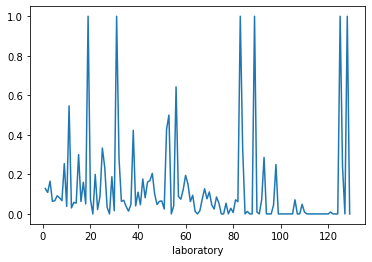

In [56]:
lab_rate = data.groupby('laboratory')['result'].sum()/data.groupby('laboratory')['eid'].count()
# See full list by expanding the visible rows by running the command below
# pd.set_option('display.max_rows', None)
display(lab_rate)
lab_rate.plot()

In [11]:
data.groupby('laboratory')['eid'].count()

laboratory
1       846
2       138
3      1455
4       830
5        30
       ... 
125       6
126      46
127       8
128       2
129       3
Name: eid, Length: 128, dtype: int64

### Test positive rate for each laboratories(not considering repeat tests)

In [20]:
 data.groupby(['laboratory','eid'])['result']

In [78]:
df = pd.DataFrame({'laboratory' : ['1', '2', '3', '3','4','5','5','5','6'], 'eid' : ['123','234','345','345','456','567','567','567','789'], 'result' : ['1','0','1','1','1','1','1','0','0']})
display(df)
df.groupby(['laboratory','eid'])['result'].apply(lambda x: (x == 1).sum())

,laboratory,eid,result
0,1,123,1
1,2,234,0
2,3,345,1
3,3,345,1
4,4,456,1
5,5,567,1
6,5,567,1
7,5,567,0
8,6,789,0


laboratory  eid
1           123    0
2           234    0
3           345    0
4           456    0
5           567    0
6           789    0
Name: result, dtype: int64

In [77]:
df = pd.DataFrame({'laboratory' : ['1', '2', '3', '3','4','5','5','5','6'], 'eid' : ['123','234','345','345','456','567','567','567','789'], 'result' : ['1','0','1','1','1','1','1','0','0']})
display(df)
df['laboratory'] = df['laboratory'].astype('category')
df['eid'] = df['eid'].astype('category')
display(df[df['result'] == 1].groupby(['laboratory','eid']).size()) 

,laboratory,eid,result
0,1,123,1
1,2,234,0
2,3,345,1
3,3,345,1
4,4,456,1
5,5,567,1
6,5,567,1
7,5,567,0
8,6,789,0


laboratory  eid
1           123    0
            234    0
            345    0
            456    0
            567    0
            789    0
2           123    0
            234    0
            345    0
            456    0
            567    0
            789    0
3           123    0
            234    0
            345    0
            456    0
            567    0
            789    0
4           123    0
            234    0
            345    0
            456    0
            567    0
            789    0
5           123    0
            234    0
            345    0
            456    0
            567    0
            789    0
6           123    0
            234    0
            345    0
            456    0
            567    0
            789    0
dtype: int64

### Whether acute helps with testing(from positive to negative or the other way around)